Задача №1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.110e+04
Date:                Thu, 11 Apr 2024   Prob (F-statistic):          2.68e-154
Time:                        02:57:59   Log-Likelihood:                 95.605
No. Observations:                 100   AIC:                            -185.2
Df Residuals:                      97   BIC:                            -177.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9754      0.014     70.534      0.0

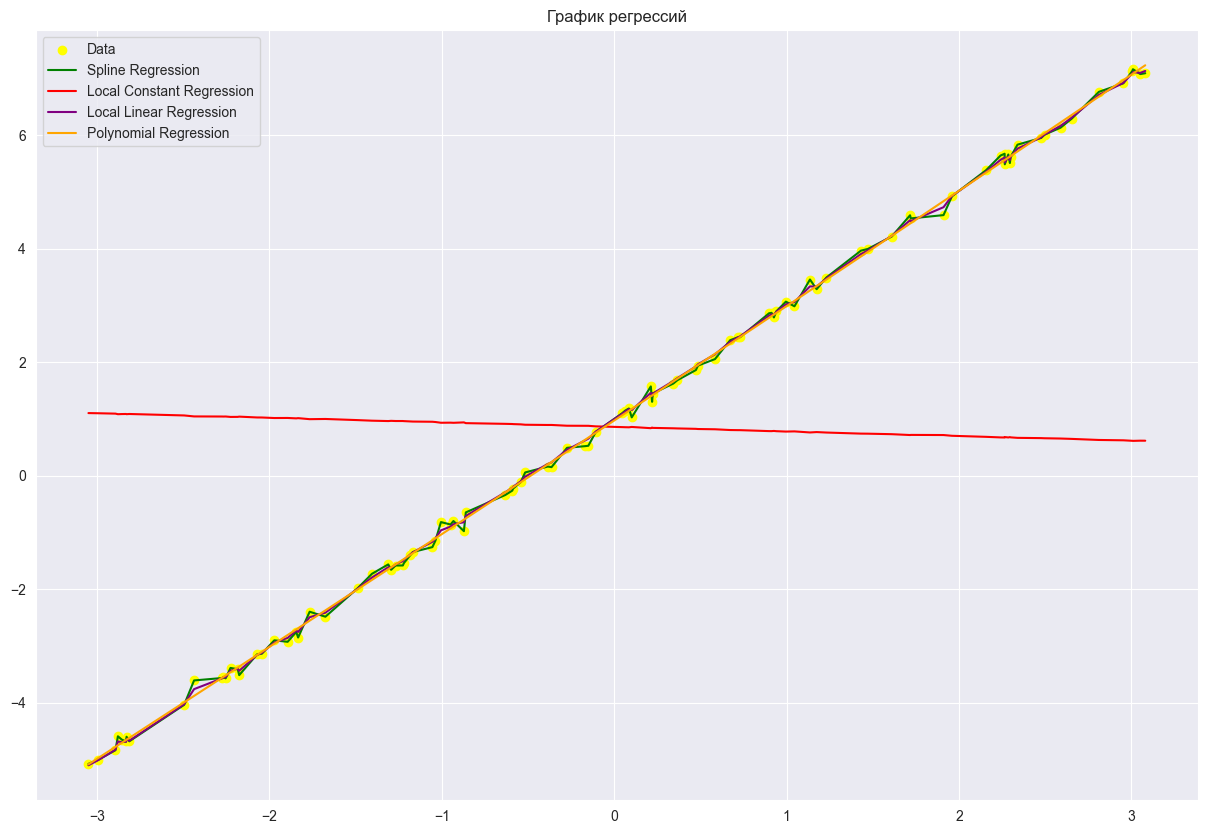

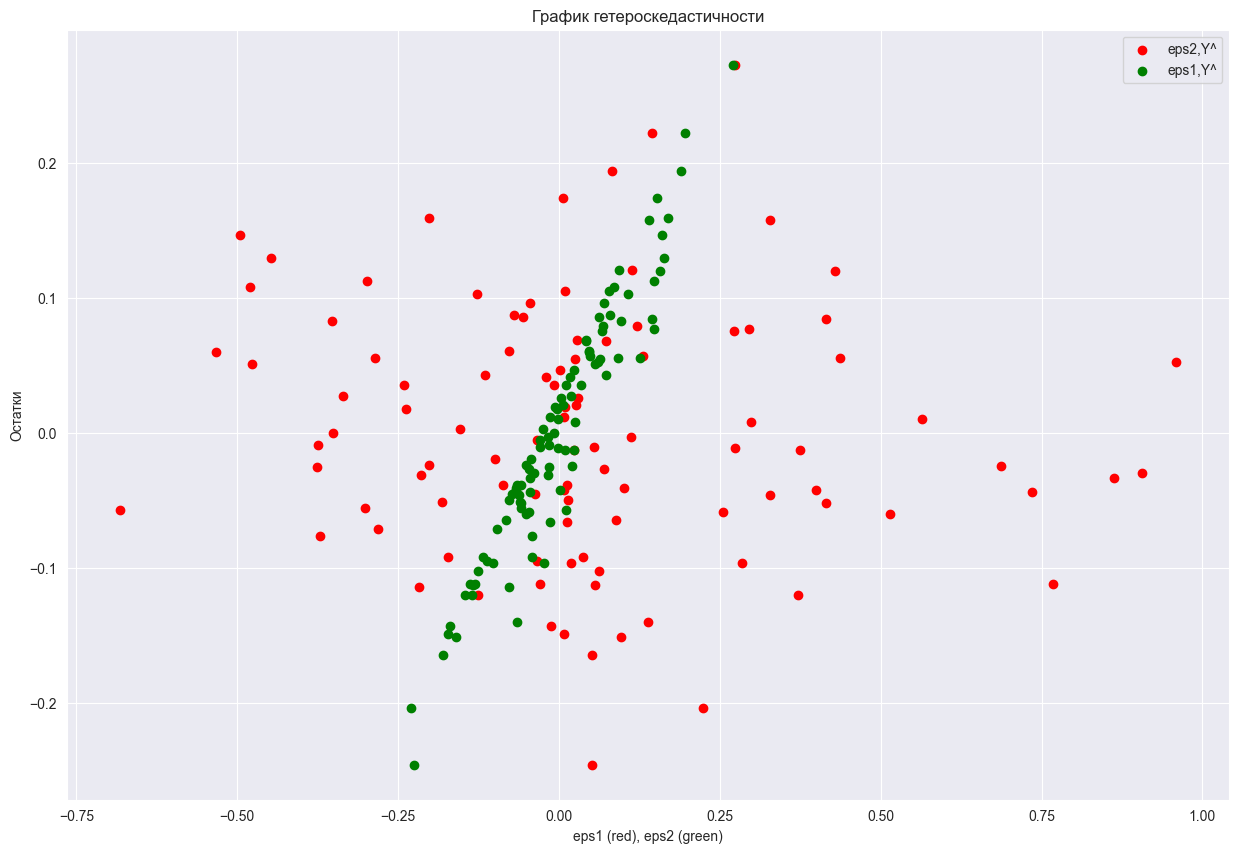

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6523.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):          3.98e-104
Time:                        02:58:00   Log-Likelihood:                -21.536
No. Observations:                 100   AIC:                             49.07
Df Residuals:                      97   BIC:                             56.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9693      0.045     21.725      0.0

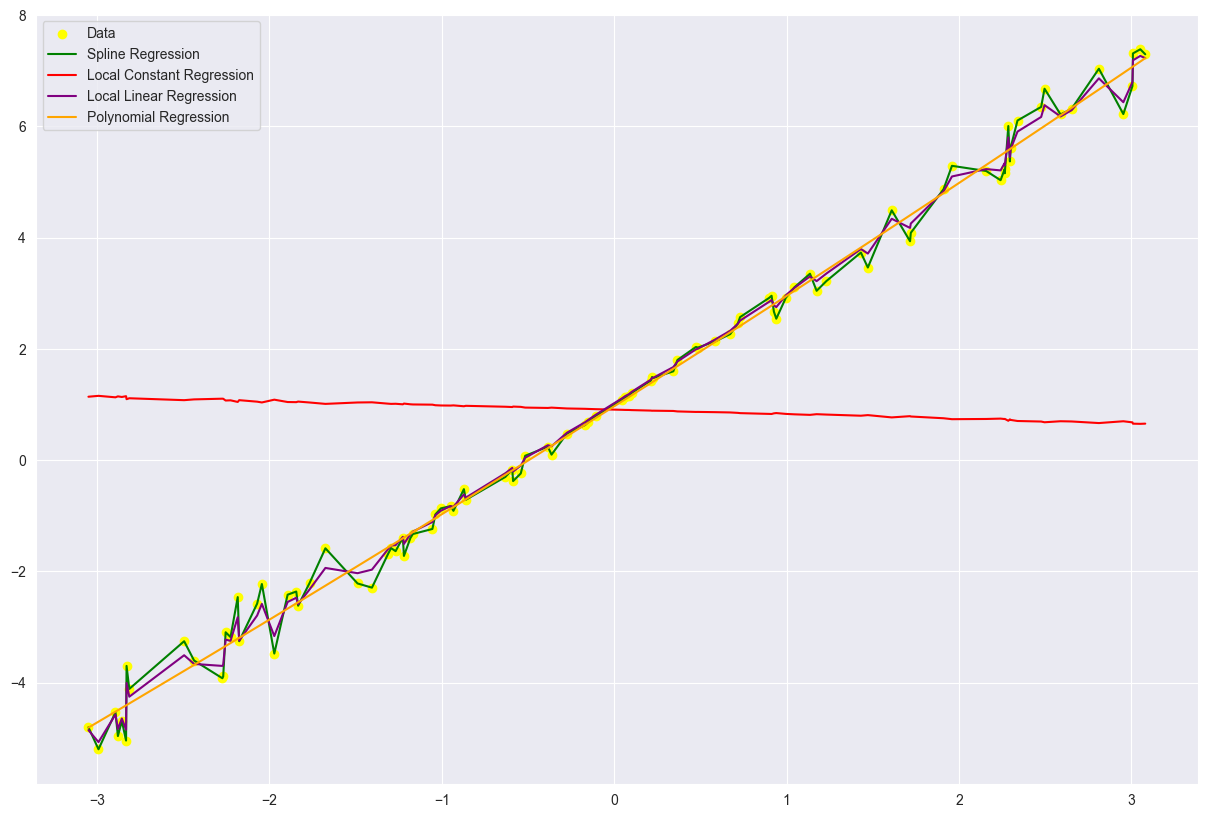

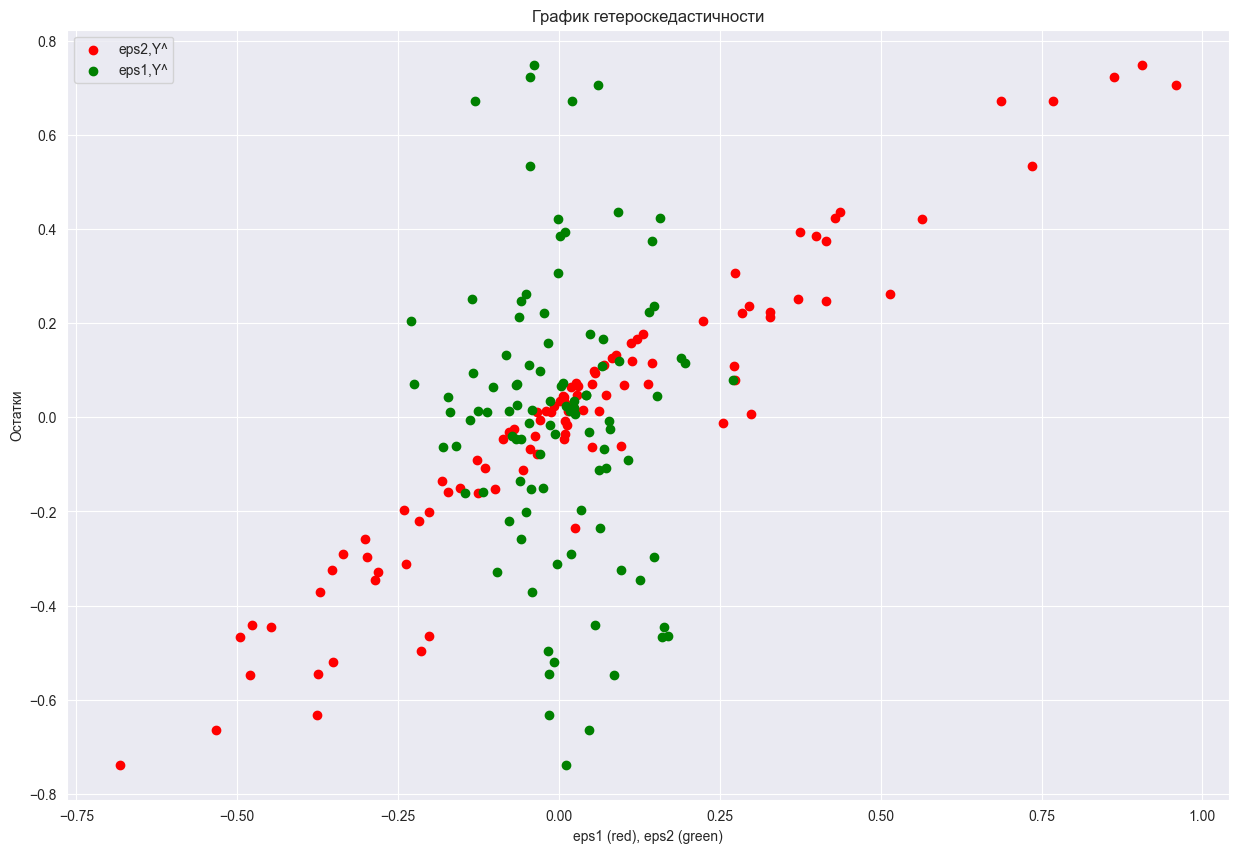

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     71.59
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           8.00e-20
Time:                        02:58:00   Log-Likelihood:                -64.204
No. Observations:                 100   AIC:                             134.4
Df Residuals:                      97   BIC:                             142.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9444      0.068     13.814      0.0

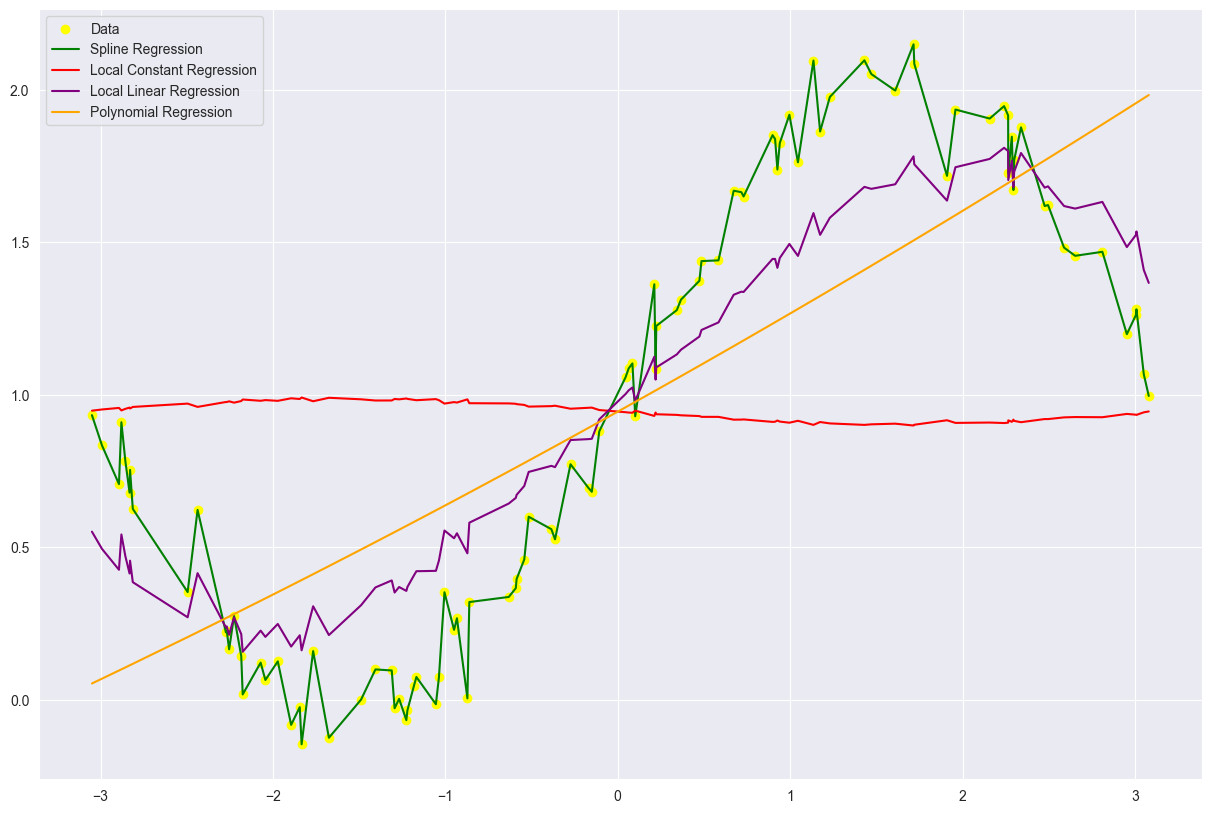

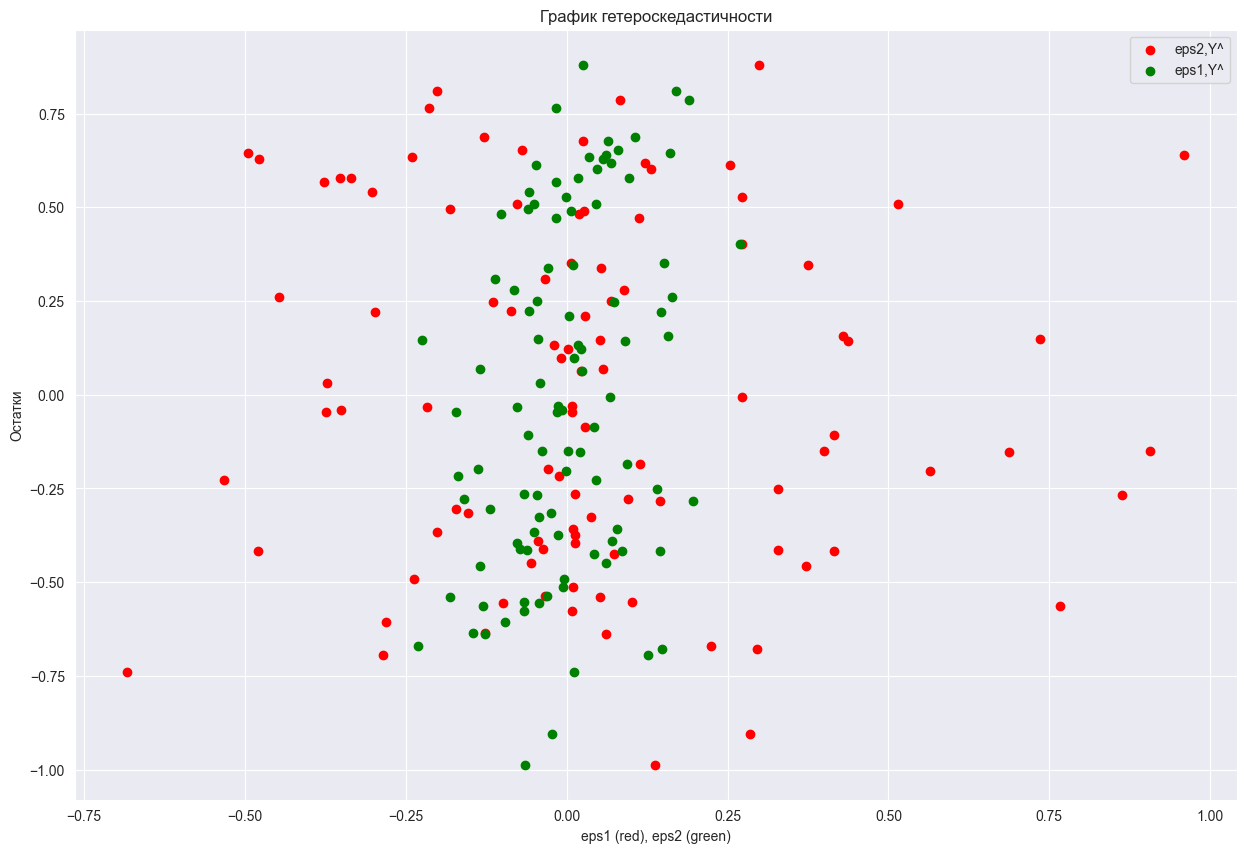

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     42.29
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           6.23e-14
Time:                        02:58:00   Log-Likelihood:                -75.647
No. Observations:                 100   AIC:                             157.3
Df Residuals:                      97   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9383      0.077     12.241      0.0

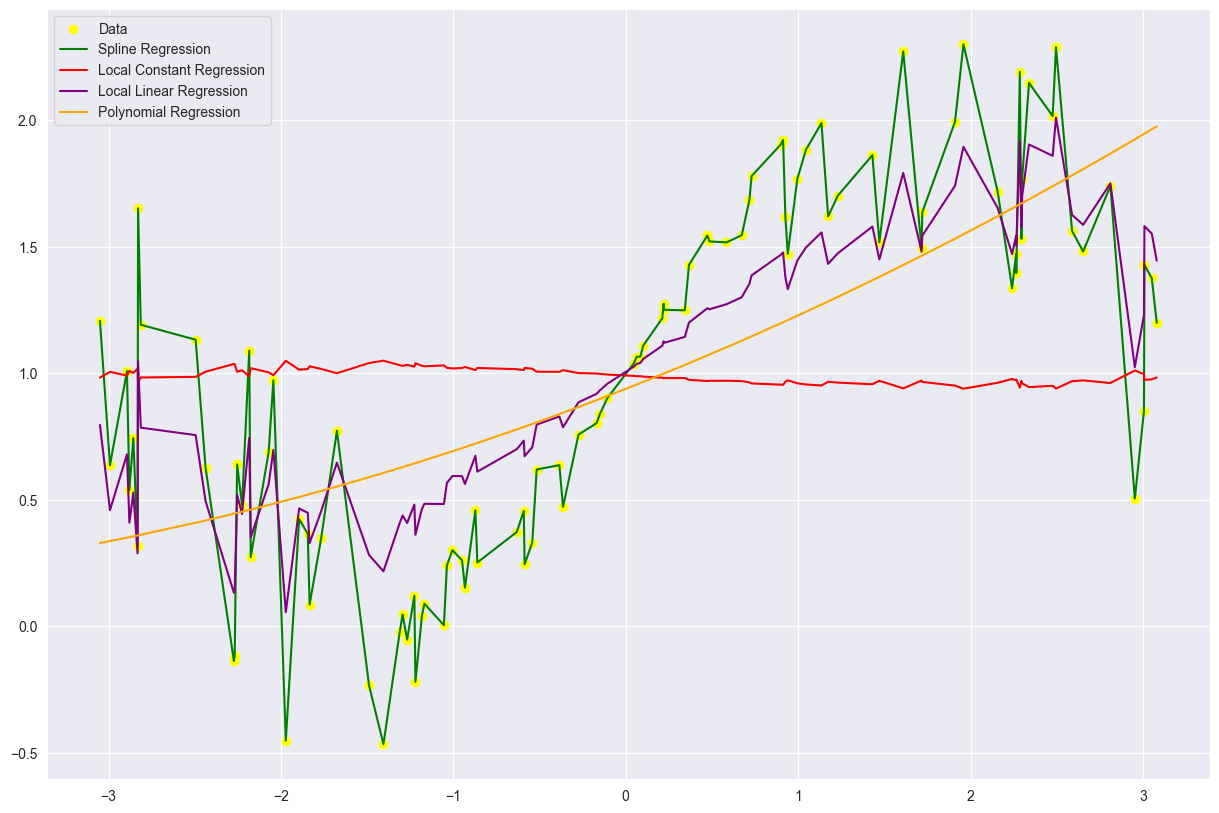

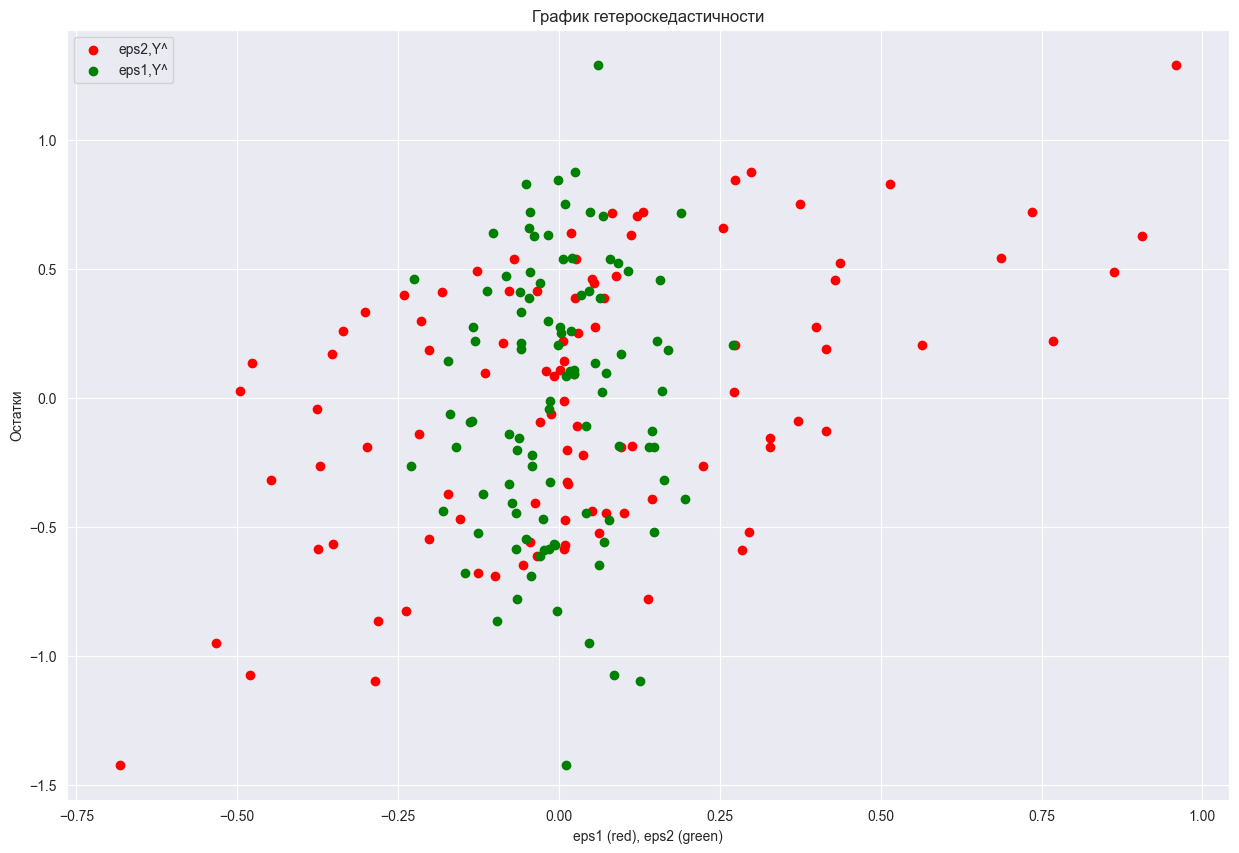

In [39]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv


n = 100

#Var a
X0 = np.ones(n)
X = np.random.uniform(-math.pi,math.pi, n)
X.sort()
eps_1 = np.random.normal(0,0.1, n)
eps_2 = np.random.normal(0, abs(X/5), n)
Y_11 = 2*X + 1 + eps_1
Y_12 = 2*X + 1 + eps_2
Y_21 = np.sin(X) + eps_1 +1
Y_22 = np.sin(X) + eps_2 +1
df = pd.DataFrame({'X': X, 
                   'Y_11': Y_11, 
                   'Y_12': Y_12, 
                   'Y_21': Y_21, 
                   'Y_22': Y_22})

# model = statsmodels.nonparametric.kernel_regression.KernelReg(X, Y_11, 'u', reg_type = "lc").fit() 
# print(model)

# Локально постоянная и линейная регрессия
def local_constant_regression(X, Y, kernel):
    model = sm.nonparametric.KernelReg(Y, X, var_type='u', reg_type='lc', bw='cv_ml', ukertype=kernel)
    return model

def local_linear_regression(X, Y, kernel):
    model = sm.nonparametric.KernelReg(Y, X, var_type='u', reg_type='ll', bw='cv_ml', ukertype=kernel)
    return model

# Регрессия сплайнами
def spline_regression(X, Y, k=3):
    
    xs = sorted(zip(X, Y), key=lambda tup: tup[0])
    x_sorted = [x[0] for x in xs]
    y_sorted = [x[1] for x in xs]
    spl = splrep(x_sorted, y_sorted, k=k)
    y_smooth = splev(x_sorted, spl)
    
    return x_sorted, y_smooth


# Построение регрессий и сравнение моделей

# Регрессия по ядрам
kernels = ['aitchison_aitken_reg', 'aitchisonaitken']
for kernel in kernels:
    results_lc_11 = local_constant_regression(X, Y_11, kernel)
    results_ll_11 = local_linear_regression(X, Y_11, kernel)
    results_lc_12 = local_constant_regression(X, Y_12, kernel)
    results_ll_12 = local_linear_regression(X, Y_12, kernel)
    results_lc_21 = local_constant_regression(X, Y_21, kernel)
    results_ll_21 = local_linear_regression(X, Y_21, kernel)
    results_lc_22 = local_constant_regression(X, Y_22, kernel)
    results_ll_22 = local_linear_regression(X, Y_22, kernel)

# Регрессия сплайнами
x_spline11, y_spline_11 = spline_regression(X, Y_11)
x_spline12, y_spline_12 = spline_regression(X, Y_12)
x_spline21, y_spline_21 = spline_regression(X, Y_21)
x_spline22, y_spline_22 = spline_regression(X, Y_22)

# Полиномиальная регрессия
X_poly = sm.add_constant(np.column_stack((X0, X, X**2)))
# X_poly2 = sm.add_constant(np.column_stack((X0, X)))
model_poly_11 = sm.OLS(Y_11, X_poly).fit()
model_poly_12 = sm.OLS(Y_12, X_poly).fit()
model_poly_21 = sm.OLS(Y_21, X_poly).fit()
model_poly_22 = sm.OLS(Y_22, X_poly).fit()
print(model_poly_11.summary())




# Сравнение моделей по метрикам качества

b = model_poly_11.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
# print(model_poly_11.summary())
plt.figure(figsize=(15, 10))
plt.scatter(X, Y_11, color='yellow', label='Data')
plt.plot(x_spline11, y_spline_11, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_11.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_11.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.title('График регрессий')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_11.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_11.resid, color='green', label='eps1,Y^')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

b = model_poly_12.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_12.summary())

plt.figure(figsize=(15, 10))
plt.scatter(X, Y_12, color='yellow', label='Data')
plt.plot(x_spline12, y_spline_12, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_12.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_12.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_12.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_12.resid, color='green', label='eps1,Y^')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()


b = model_poly_21.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_21.summary())

plt.figure(figsize=(15, 10))
plt.scatter(X, Y_21, color='yellow', label='Data')
plt.plot(x_spline21, y_spline_21, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_21.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_21.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_21.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_21.resid, color='green', label='eps1,Y^')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

b = model_poly_22.params
Y_plt = b[0] + b[1] * X + b[2]* X**2
print(model_poly_22.summary())

plt.figure(figsize=(15, 10))

plt.scatter(X, Y_22, color='yellow', label='Data')
plt.plot(x_spline22, y_spline_22, color='green', label='Spline Regression')
plt.plot(df['X'], results_lc_22.fit(df['X'])[0], color='red', label='Local Constant Regression')
plt.plot(df['X'], results_ll_22.fit(df['X'])[0], color='purple', label='Local Linear Regression')
plt.plot(df['X'], Y_plt, color='orange', label='Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.scatter(eps_2, model_poly_22.resid, color='r', label='eps2,Y^')
plt.scatter(eps_1, model_poly_22.resid, color='green', label='eps1,Y^')
plt.title('График гетероскедастичности')
plt.ylabel('Остатки')
plt.xlabel('eps1 (red), eps2 (green)')
plt.legend()
plt.show()

zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory
